In [1]:
import numpy as np       
import pandas as pd       
import matplotlib.pyplot as plt  
import seaborn as sns 

In [2]:
sms=pd.read_csv("C:/Users/ayushi/OneDrive/Documents/spam.csv", encoding='latin-1')

In [3]:
sms

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
sms.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [5]:
sms

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
sms.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
x=sms["v2"]
y=sms["v1"]

In [9]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
fit=le.fit_transform(sms['v1'])

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=45)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec= TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
X_train_tfidf = vec.fit_transform(x_train)
X_test_tfidf = vec.transform(x_test)

In [12]:
print(vec)

TfidfVectorizer(stop_words='english')


In [13]:
x_train, x_test, y_train, y_test

(1201                                 I know she called me
 77      I like you peoples very much:) but am very shy...
 1346    Is it ok if I stay the night here? Xavier has ...
 2753    Derp. Which is worse, a dude who always wants ...
 3097             This is all just creepy and crazy to me.
                               ...                        
 4473    Want explicit SEX in 30 secs? Ring 02073162414...
 580     Huh so early.. Then Ì_ having dinner outside i...
 163     -PLS STOP bootydelious (32/F) is inviting you ...
 4703                     Yar but they say got some error.
 3616    Sorry sent blank msg again. Yup but trying 2 d...
 Name: v2, Length: 3900, dtype: object,
 5005                                      ILL B DOWN SOON
 3286    The gas station is like a block away from my h...
 4580    Not course. Only maths one day one chapter wit...
 3328      Sac will score big hundred.he is set batsman:-)
 1508    Sounds like something that someone testing me ...
                

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3900,), (1672,), (3900,), (1672,))

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

MultinomialNB()

In [17]:
predictions = naive_bayes.predict(X_test_tfidf)

In [18]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [19]:
#logistic_regression

In [20]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [21]:
y_pred1=model.predict(X_test_tfidf)

In [22]:
y_pred1

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
model.score(X_test_tfidf,y_test)

0.9503588516746412

In [25]:
model.score(X_train_tfidf,y_train)

0.9674358974358974

In [26]:
classification_report(y_test,y_pred1)

'              precision    recall  f1-score   support\n\n         ham       0.95      1.00      0.97      1427\n        spam       0.99      0.67      0.80       245\n\n    accuracy                           0.95      1672\n   macro avg       0.97      0.83      0.88      1672\nweighted avg       0.95      0.95      0.95      1672\n'

In [27]:
conf_matrix=confusion_matrix(y_test, y_pred1)

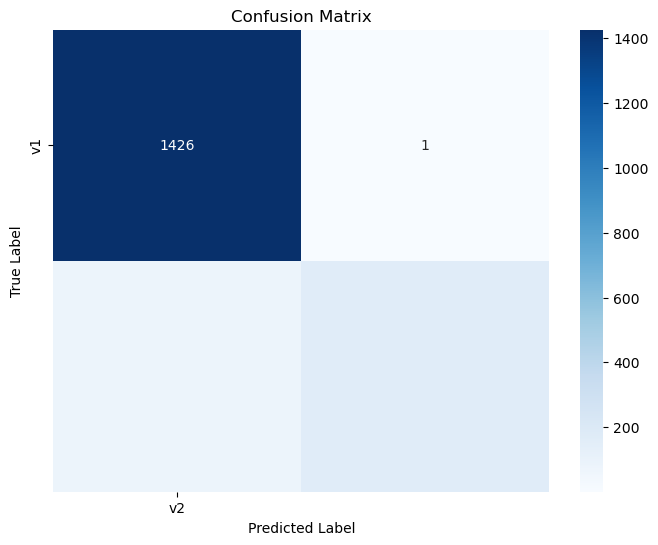

In [28]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['v2'], yticklabels=['v1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [29]:
#SVC

In [30]:
from sklearn.svm import SVC
model2=SVC()
model2.fit(X_train_tfidf, y_train)

SVC()

In [31]:
y_pred2=model2.predict(X_test_tfidf)

In [32]:
y_pred2

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [33]:
model2.score(X_test_tfidf,y_test)

0.9754784688995215

In [34]:
model2.score(X_train_tfidf,y_train)

0.9982051282051282

In [35]:
classification_report(y_test,y_pred2)

'              precision    recall  f1-score   support\n\n         ham       0.97      1.00      0.99      1427\n        spam       0.99      0.84      0.91       245\n\n    accuracy                           0.98      1672\n   macro avg       0.98      0.92      0.95      1672\nweighted avg       0.98      0.98      0.97      1672\n'

In [36]:
conf_matrix2=confusion_matrix(y_test, y_pred2)

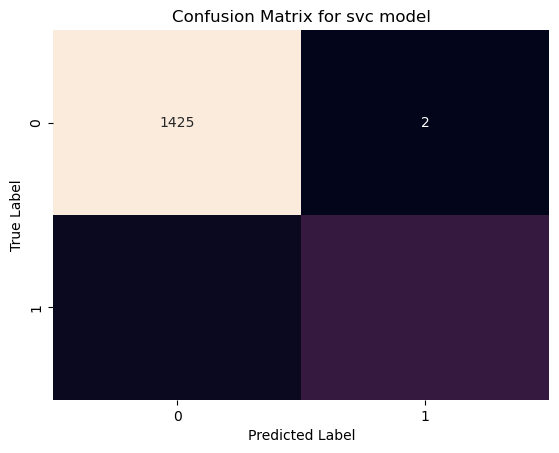

In [37]:
sns.heatmap(conf_matrix2, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix for svc model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [38]:
finaldata=pd.DataFrame({'models':['model','model2'],
             'acc':[accuracy_score(y_test,y_pred1)*100,
                    accuracy_score(y_test,y_pred2)*100  ]})

In [39]:
finaldata

,models,acc
0,model,95.035885
1,model2,97.547847


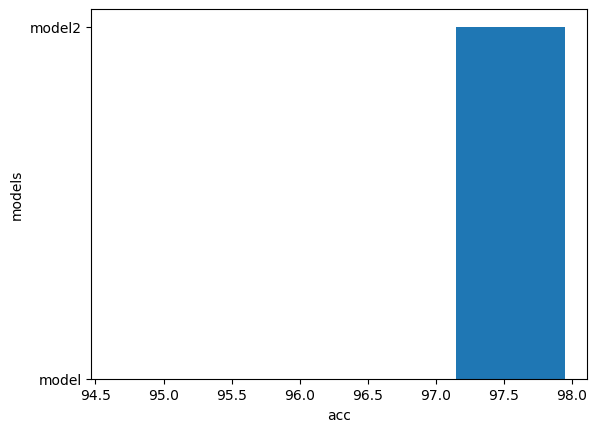

In [40]:
plt.xlabel("acc")
plt.ylabel("models")
plt.bar(finaldata.acc,finaldata.models)
plt.show()

In [42]:
# testing the model with new data (spam message)
new_data = ['Congratulations! you have won a lottery. To claim your prize, please click on the link below']
new_data = vec.transform(new_data)
pred = model.predict(new_data)[0]
if pred == 0:
    print('This is a spam message')
else:
    print('This is not a spam message')

This is not a spam message


In [44]:
# testing the model with new data (not spam message)
new_data2 = ['CODESOFT virtual internship program']
new_data2 = vec.transform(new_data2)
pred = model2.predict(new_data)[0]
if pred == 0:
    print('This is not a spam message')
else:
    print('This is a spam message')

This is a spam message


In [ ]:
#thankyou